In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.colors as mcolors
from model_training_norm import split_data_by_year_and_country, drop_columns_with_high_nan, select_columns_by_correlation, scale_capacity_to_national, convert_from_percentage_to_MW, calculate_predicted_national_capacity, gb_results, gb_scaled_results, groupby_validation, plot_actual_vs_predicted_regional_capacity, plot_actual_vs_predicted_national_capacity, plot_set, split_data_by_country  
from model_training_norm import select_columns_by_average_correlation, training_results, training_scaled_results, generate_predictions_training_data, apply_model_to_all_countries, select_columns_by_spearman_correlation
from publication_plots import  plot_timeseries_by_region, calculate_and_print_mape_per_region, calculate_percentage_error, print_spvdi_mw, calculate_and_plot_capacity_difference, plot_unallocated_capacity, calculate_regional_residuals, plot_geodata_residual, plot_actual_vs_predicted_regional_capacity, plot_actual_vs_predicted_national_capacity, plot_yearly_residual, plot_geodata_variable, create_nuts3_geodf, calculate_national_capacity_difference



In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')

In [4]:
norm_run_id = "4b2a0e8536a948e8aa478a1cbbd4533e"

# Construct the base path using the run ID
norm_base_path = f"/gb_pv_capacity_model/models/mlruns/{norm_run_id}/artifacts/"

# Load the model
norm_model = pickle.load(open(f"{norm_base_path}best_estimator/model.pkl", 'rb'))

# Load the data
norm_regional= pd.read_csv(f"{norm_base_path}regional_data.csv")
norm_gb= pd.read_csv(f"{norm_base_path}gb_data.csv")



In [5]:
# To rename land classifications 
dfc = pd.read_csv("/gb_pv_capacity_model/data_analysis/land categories.csv")
old_cols = dfc['code'].tolist()
new_cols = dfc['Land Type'].tolist()
col_map = dict(zip(old_cols, new_cols))

# df = rename_clc_codes(df)

In [6]:
national_capacity_difference = calculate_national_capacity_difference(norm_gb)
national_capacity_difference

,country_cd,year,national_capacity_mwp,capacity_mwp,Capacity Difference (MW)
0,UK,2010,79.786102,76.712379,3.073724
1,UK,2011,993.631467,927.090194,66.541273
2,UK,2012,1778.962003,1634.080588,144.881415
3,UK,2013,2891.717265,2704.423101,187.294164
4,UK,2014,5364.097718,5128.600943,235.496775
5,UK,2015,9543.595742,9199.488210,344.107532
6,UK,2016,11630.791907,11202.110643,428.681264
7,UK,2017,12445.344577,11972.479743,472.864834
8,UK,2018,12668.589027,12171.897193,496.691834
9,UK,2019,13024.980325,12494.635663,530.344662


In [7]:
norm_gb_geo_2023 = create_nuts3_geodf(norm_gb, year=2023)
norm_gb_geo_2022 = create_nuts3_geodf(norm_gb, year=2022)
norm_gb_geo_2021 = create_nuts3_geodf(norm_gb, year=2021)
norm_gb_geo_2020 = create_nuts3_geodf(norm_gb, year=2020)
norm_gb_geo_2019 = create_nuts3_geodf(norm_gb, year=2019)
norm_gb_geo_2018 = create_nuts3_geodf(norm_gb, year=2018)
norm_gb_geo_2017 = create_nuts3_geodf(norm_gb, year=2017)
norm_gb_geo_2016 = create_nuts3_geodf(norm_gb, year=2016)
norm_gb_geo_2015 = create_nuts3_geodf(norm_gb, year=2015)
norm_gb_geo_2014 = create_nuts3_geodf(norm_gb, year=2014)
norm_gb_geo = create_nuts3_geodf(norm_gb, year=(2010, 2023))

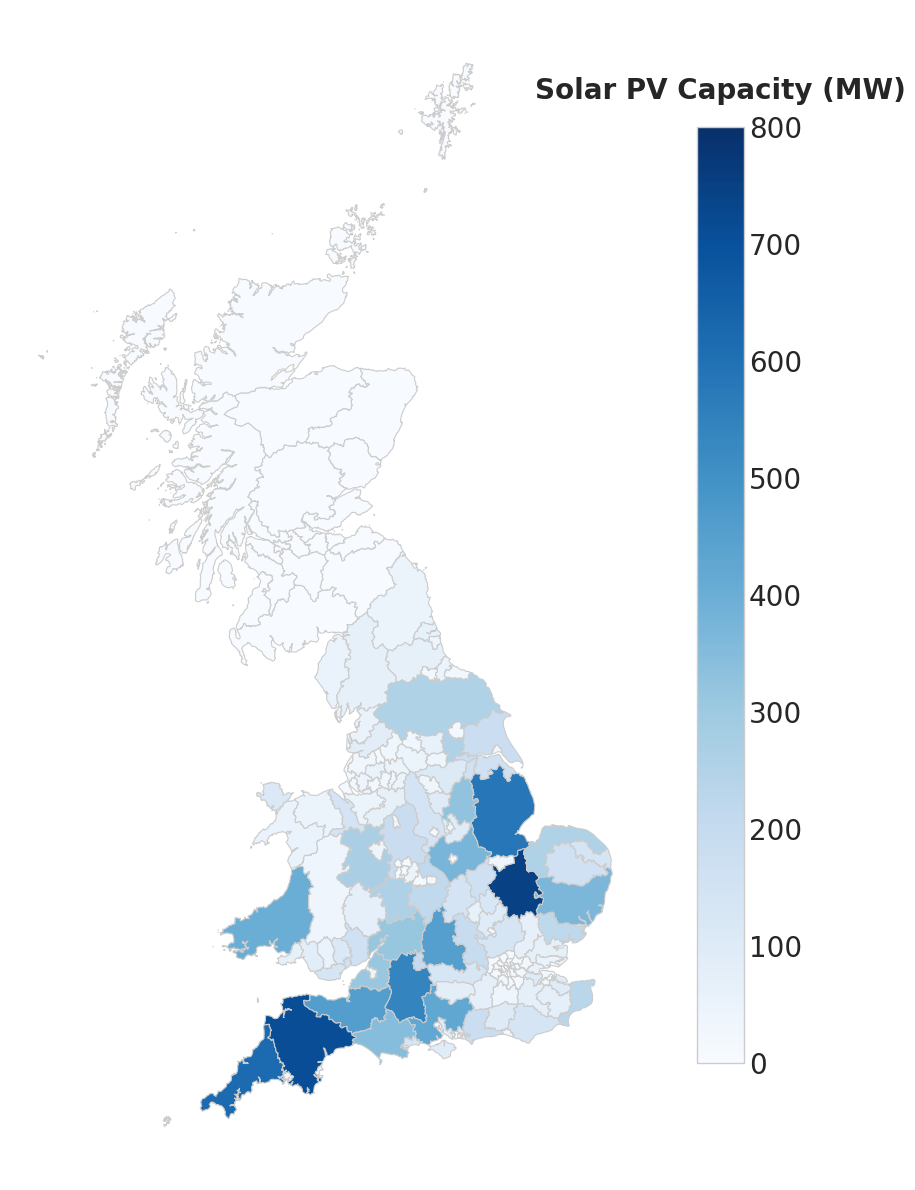

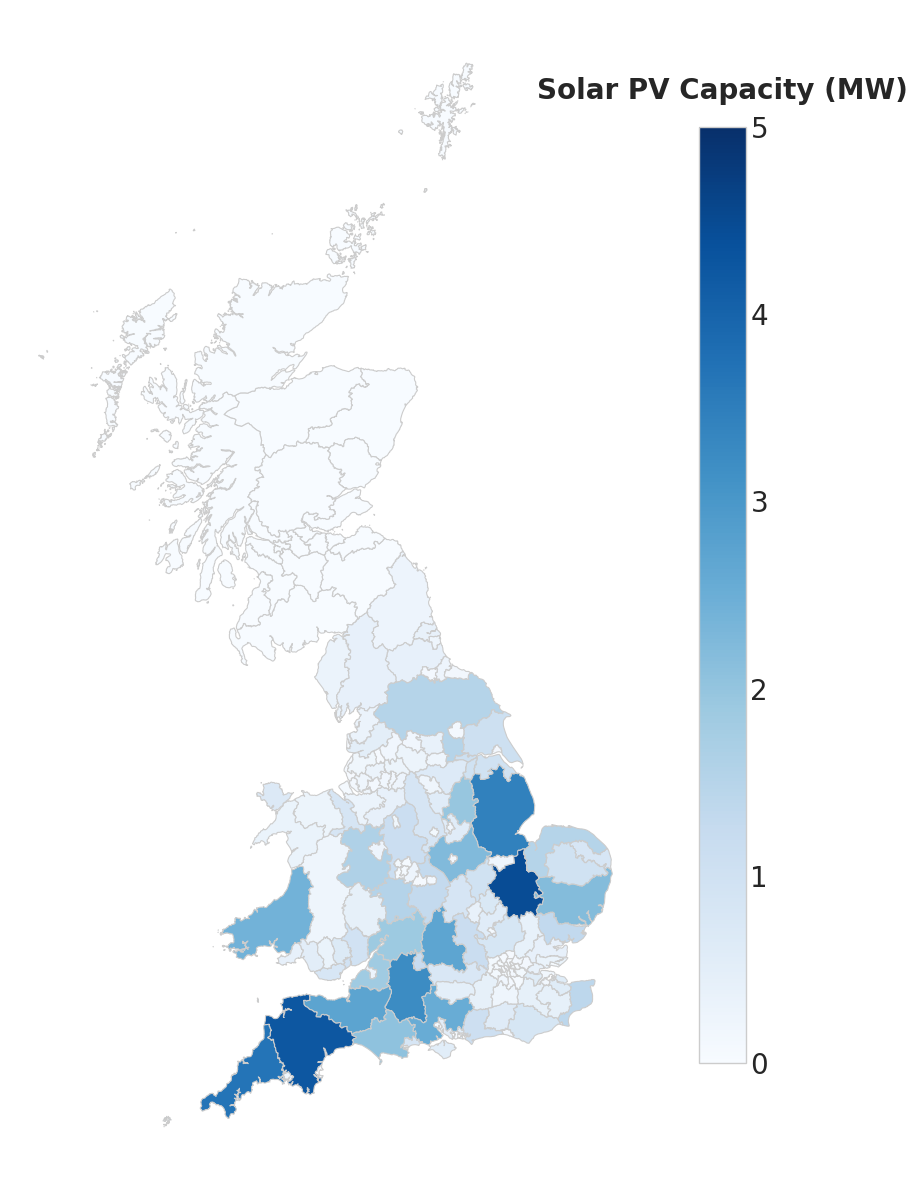

In [8]:
# keep 
# actual capacity for the year 2023
plot_geodata_variable(norm_gb_geo_2023, 'capacity_mwp', 'Solar PV Capacity (MW)', 0, 800, save_figure=True)
plot_geodata_variable(norm_gb_geo_2023, 'regional_capacity_percentage', 'Solar PV Capacity (MW)', 0, 5, save_figure=False)


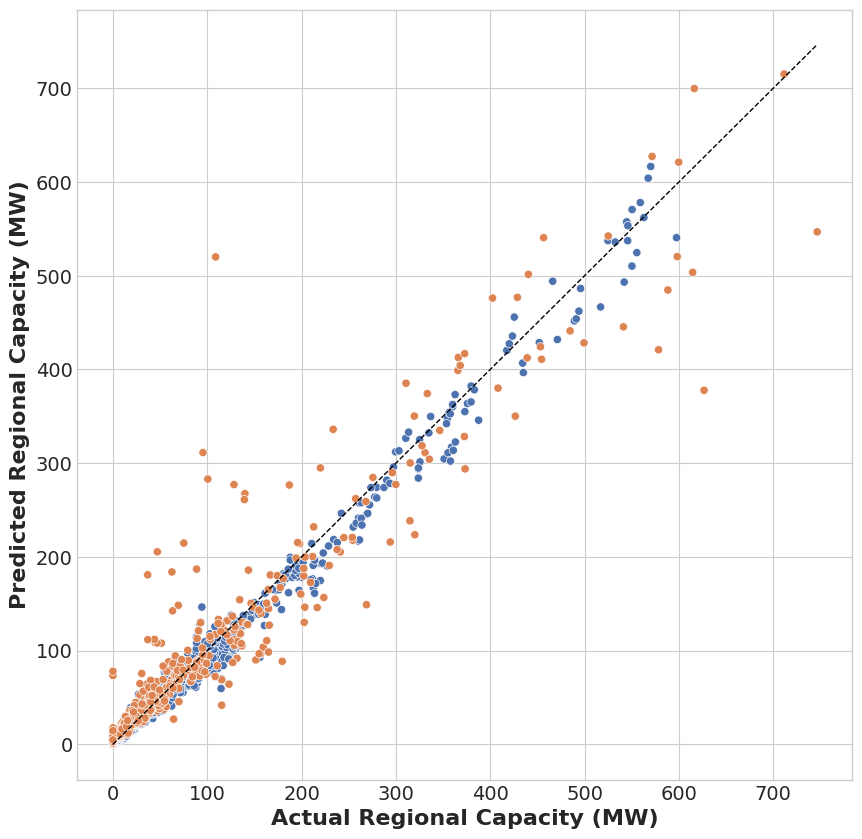

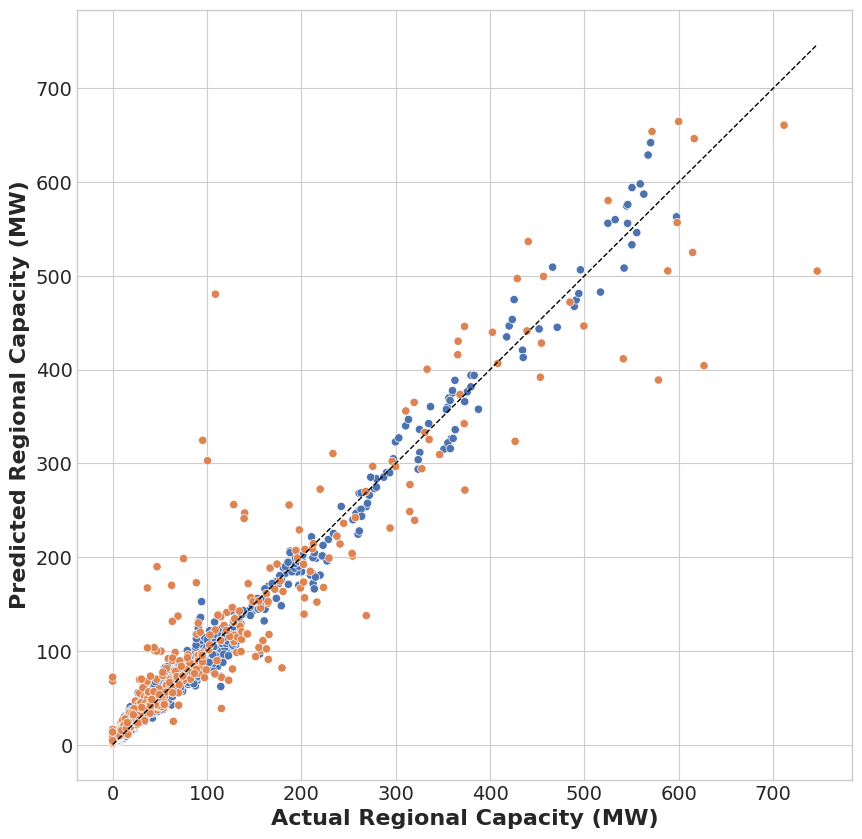

In [10]:
plot_actual_vs_predicted_regional_capacity(norm_gb, capacity_unit='MW', scaled=False, split_column='set', save_figure=True)
plot_actual_vs_predicted_regional_capacity(norm_gb, capacity_unit='MW', scaled=True, split_column='set', save_figure=True)

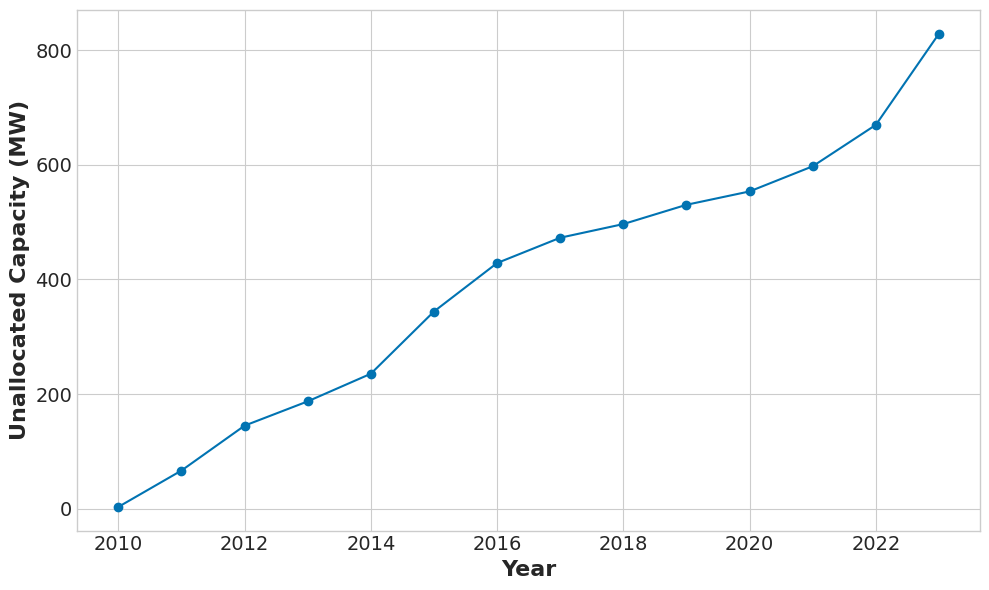

In [11]:
# keep 
# Plot capacity difference vs year
plot_unallocated_capacity(national_capacity_difference, save_figure=True)

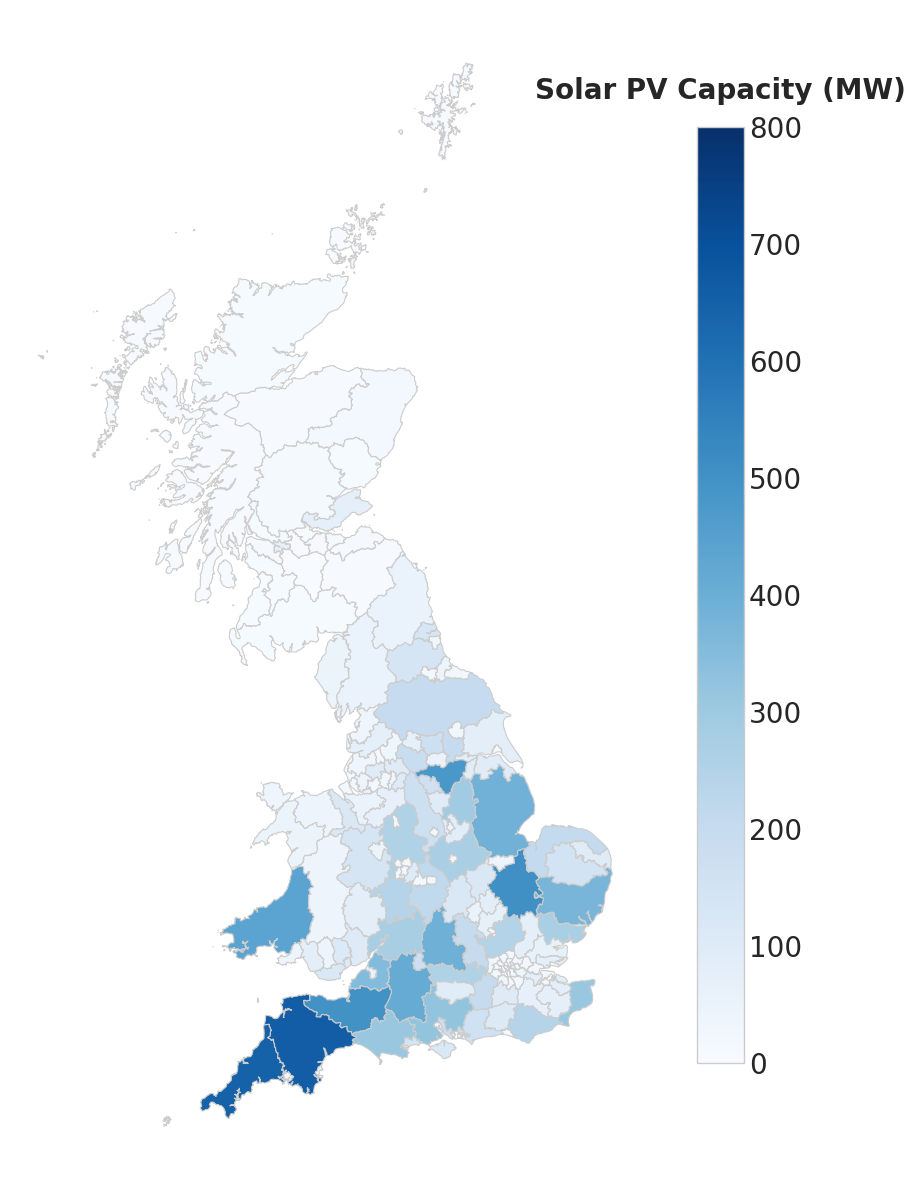

In [12]:
# keep
# scaled predicted capacity for 2023. allocating capacity to regions. 
plot_geodata_variable(norm_gb_geo_2023, 'scaled_predicted_capacity_mwp', 'Solar PV Capacity (MW)', 0, 800, save_figure=True)

Initial DataFrame shape: (2352, 44)
Unique years in the input data: [2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.
 2022. 2023.]
Filtered DataFrame shape: (2352, 44)
Sample Capacity_Difference values:
    nuts_cd    year  Capacity_Difference
952   UKM92  2010.0            -0.012489
953   UKM92  2011.0            -0.218599
954   UKM92  2012.0            -0.073531
955   UKM92  2013.0            -0.437855
956   UKM92  2014.0            -0.221718
Sum by region:
nuts_cd
UKC11      2.161301
UKC12     -3.029546
UKC13      4.670294
UKC14   -188.473132
UKC21   -105.027633
            ...    
UKM91    -12.052879
UKM92    -21.578417
UKM93    -41.755718
UKM94    -32.395138
UKM95    -35.180290
Name: Capacity_Difference, Length: 168, dtype: float64
Region Code: UKC11, Region Name: Hartlepool and Stockton-on-Tees, Capacity Difference: 2.2 MW
Region Code: UKC12, Region Name: South Teesside, Capacity Difference: -3.0 MW
Region Code: UKC13, Region Name: Darlington, Capacity Dif

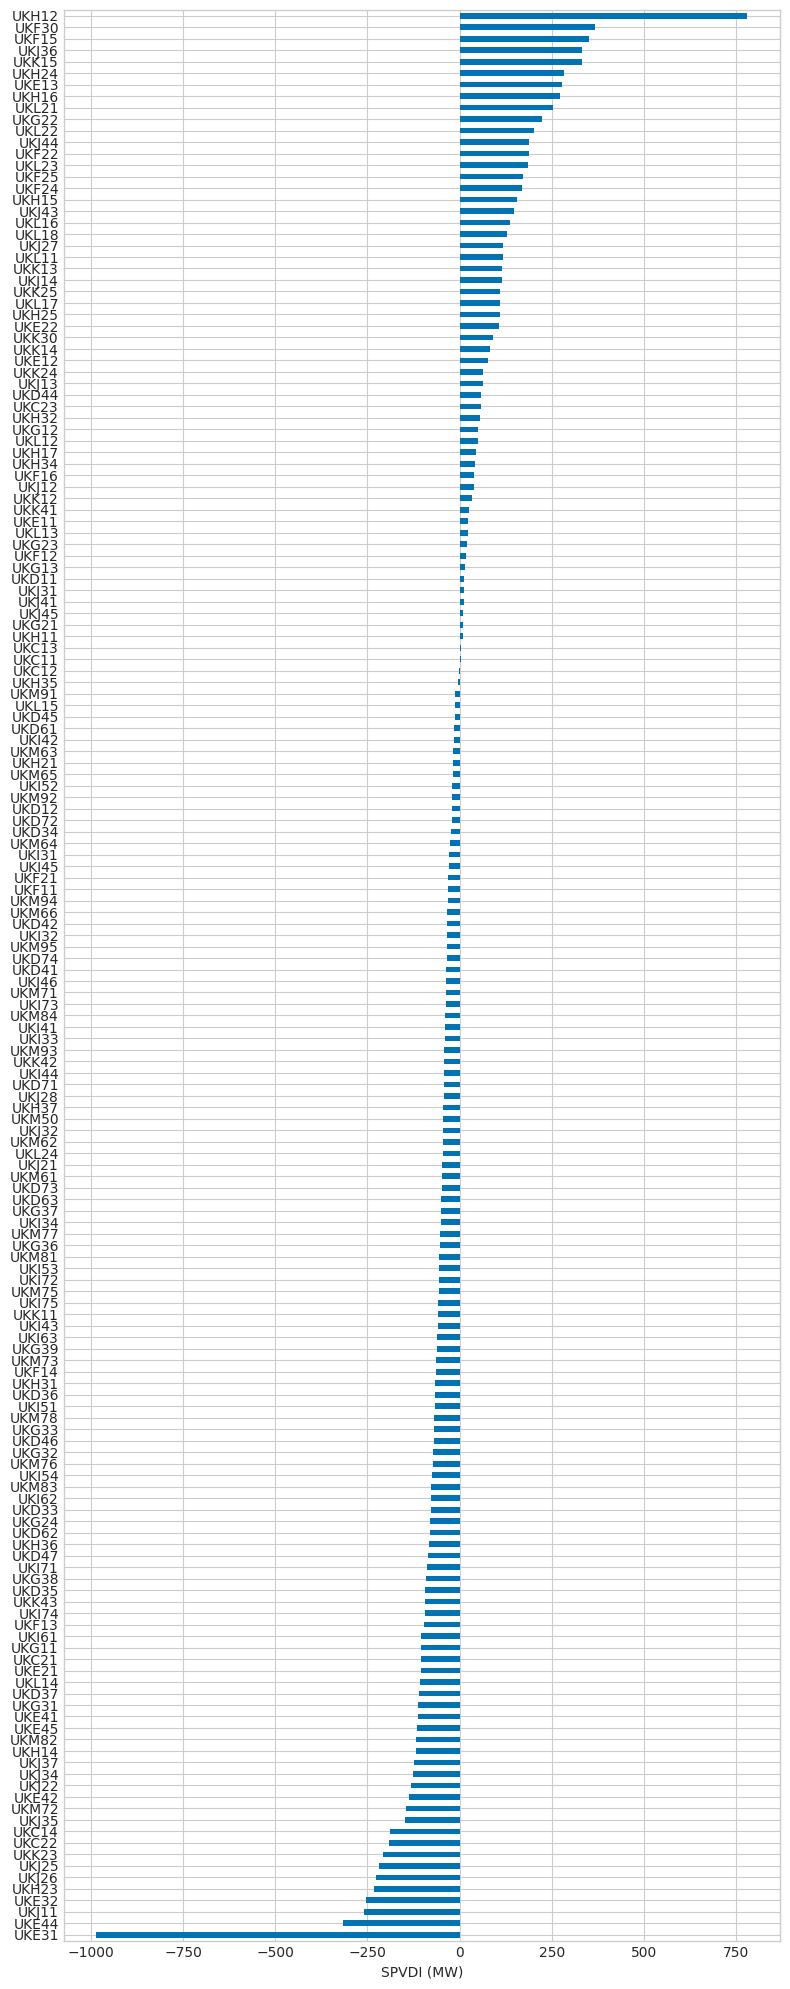

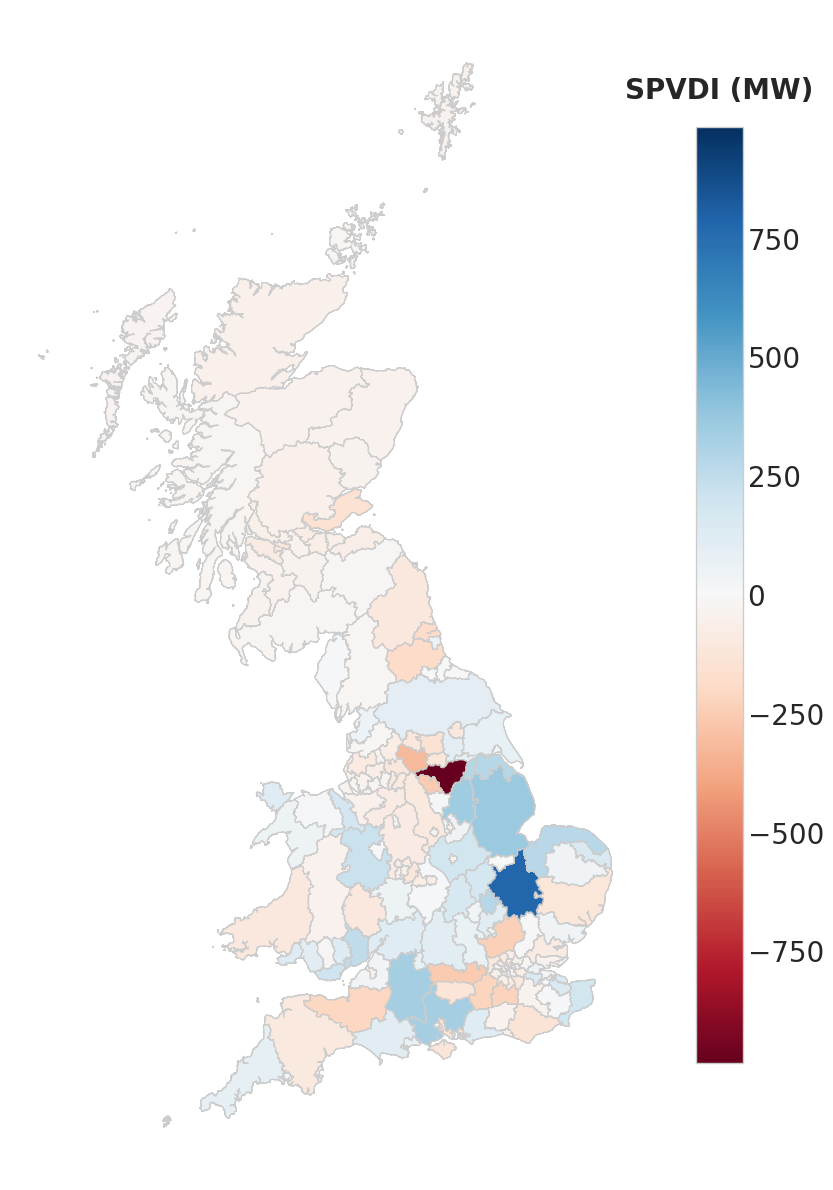

In [13]:
norm_gb_2010_2023 = calculate_and_plot_capacity_difference(norm_gb_geo, 2010, 2023, save_figure=False)

-1.220116263664317 53.48223699350007
-0.04634555103474072 52.36997024900006


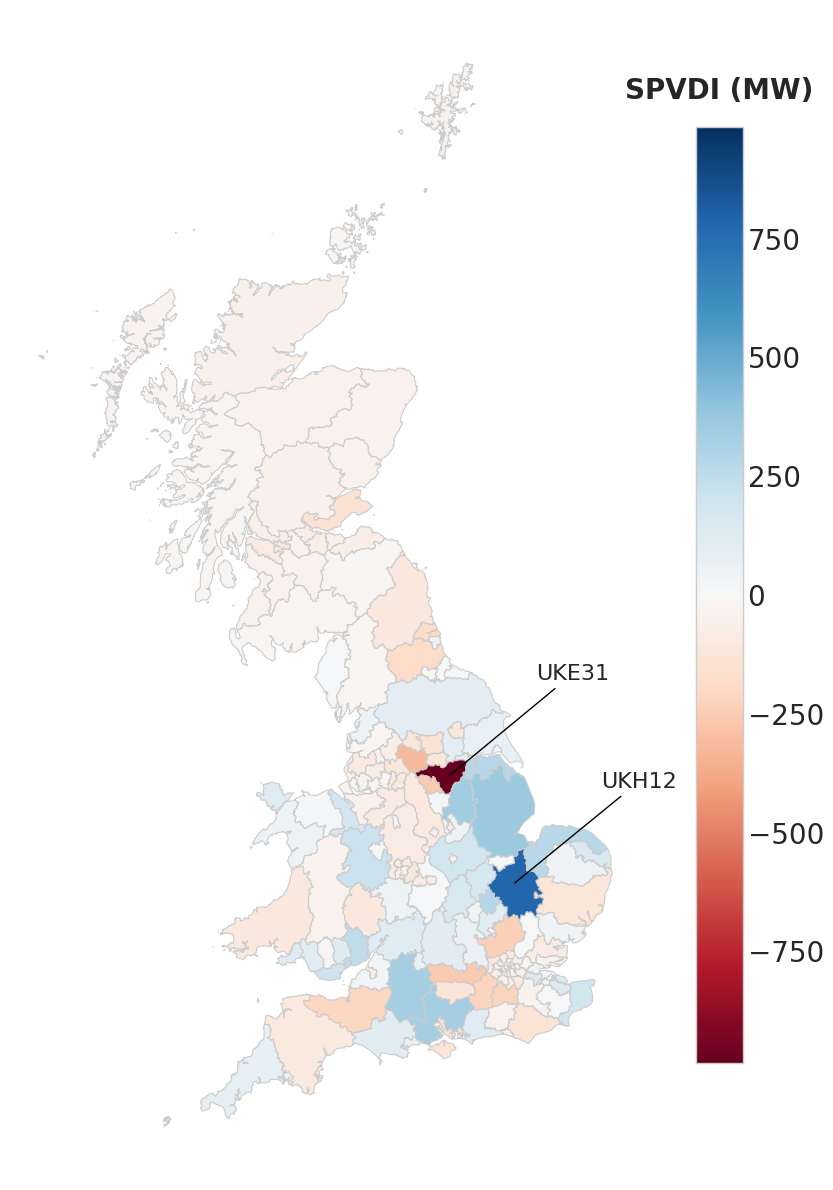

In [14]:
# plot spdvi and annotate interesting regions
selected_rows_2023 = norm_gb_2010_2023[norm_gb_2010_2023['year'] == 2023]
plot_geodata_residual(geo_data=selected_rows_2023, variable_name='Capacity_Difference', colorbar_label='SPVDI (MW)', vmin=None, vmax=None, vcenter=0, show_labels=False, label_regions=None, show_annotations=True, annotation_regions=["UKH12","UKE31"], annotation_x=1.6, annotation_y=1, save_figure=True)

In [9]:
# top and bottom 10 regions
print_spvdi_mw(norm_gb_geo_2023, 'residual_mwp', n_regions=10) 
print_spvdi_mw(norm_gb_geo_2022, 'residual_mwp', n_regions=10)
print_spvdi_mw(norm_gb_geo_2021, 'residual_mwp', n_regions=10)
print_spvdi_mw(norm_gb_geo_2020, 'residual_mwp', n_regions=10)


Top 10 Regions with Positive Residuals and Bottom 10 Regions with Negative Residuals:
Region Name: Cambridgeshire CC, Region Code: UKH12, Residual: 200 MW
Region Name: Lincolnshire, Region Code: UKF30, Residual: 157 MW
Region Name: Shropshire CC, Region Code: UKG22, Residual: 120 MW
Region Name: Wiltshire CC, Region Code: UKK15, Residual: 96 MW
Region Name: East Riding of Yorkshire, Region Code: UKE12, Residual: 91 MW
Region Name: Leicestershire CC and Rutland, Region Code: UKF22, Residual: 79 MW
Region Name: Central Hampshire, Region Code: UKJ36, Residual: 76 MW
Region Name: Isle of Anglesey, Region Code: UKL11, Residual: 74 MW
Region Name: North and North East Lincolnshire, Region Code: UKE13, Residual: 67 MW
Region Name: Monmouthshire and Newport, Region Code: UKL21, Residual: 53 MW
Region Name: Barnsley, Doncaster and Rotherham, Region Code: UKE31, Residual: -411 MW
Region Name: Calderdale and Kirklees, Region Code: UKE44, Residual: -158 MW
Region Name: Berkshire, Region Code: UKJ1

In [10]:
# percentage error 
calculate_percentage_error(norm_gb_geo_2023, n_regions=168)

Top 168 Regions with Positive percentage error and Bottom 168 Regions with Negative percentage error:
Region Code: UKL11, Region Name: Isle of Anglesey,  Pdercentage Error: 64 %
Region Code: UKH32, Region Name: Thurrock,  Pdercentage Error: 58 %
Region Code: UKE12, Region Name: East Riding of Yorkshire,  Pdercentage Error: 51 %
Region Code: UKG22, Region Name: Shropshire CC,  Pdercentage Error: 45 %
Region Code: UKE13, Region Name: North and North East Lincolnshire,  Pdercentage Error: 40 %
Region Code: UKL18, Region Name: Swansea,  Pdercentage Error: 35 %
Region Code: UKL21, Region Name: Monmouthshire and Newport,  Pdercentage Error: 32 %
Region Code: UKH24, Region Name: Bedford,  Pdercentage Error: 31 %
Region Code: UKF30, Region Name: Lincolnshire,  Pdercentage Error: 27 %
Region Code: UKH12, Region Name: Cambridgeshire CC,  Pdercentage Error: 27 %
Region Code: UKJ31, Region Name: Portsmouth,  Pdercentage Error: 26 %
Region Code: UKF25, Region Name: North Northamptonshire,  Pdercent

In [11]:
# mape per region for all years spanning 2010 to 2023
calculate_and_print_mape_per_region(norm_gb_geo, actual_col='regional_capacity_percentage', predicted_col='predicted_capacity_percentage')


Region Code: UKC11, Region: Hartlepool and Stockton-on-Tees, MAPE: 14%
Region Code: UKC12, Region: South Teesside, MAPE: 10%
Region Code: UKC13, Region: Darlington, MAPE: 40%
Region Code: UKC14, Region: Durham CC, MAPE: 27%
Region Code: UKC21, Region: Northumberland, MAPE: 31%
Region Code: UKC22, Region: Tyneside, MAPE: 37%
Region Code: UKC23, Region: Sunderland, MAPE: 21%
Region Code: UKD11, Region: West Cumbria, MAPE: 11%
Region Code: UKD12, Region: East Cumbria, MAPE: 13%
Region Code: UKD33, Region: Manchester, MAPE: 32%
Region Code: UKD34, Region: Greater Manchester South West, MAPE: 14%
Region Code: UKD35, Region: Greater Manchester South East, MAPE: 28%
Region Code: UKD36, Region: Greater Manchester North West, MAPE: 22%
Region Code: UKD37, Region: Greater Manchester North East, MAPE: 27%
Region Code: UKD41, Region: Blackburn with Darwen, MAPE: 46%
Region Code: UKD42, Region: Blackpool, MAPE: 60%
Region Code: UKD44, Region: Lancaster and Wyre, MAPE: 20%
Region Code: UKD45, Region

,nuts_cd,nuts_name,MAPE
0,UKC11,Hartlepool and Stockton-on-Tees,14.441638
1,UKC12,South Teesside,9.965234
2,UKC13,Darlington,39.969612
3,UKC14,Durham CC,27.429825
4,UKC21,Northumberland,31.025525
...,...,...,...
163,UKM91,Scottish Borders,inf
164,UKM92,Dumfries & Galloway,inf
165,UKM93,East Ayrshire and North Ayrshire mainland,inf
166,UKM94,South Ayrshire,inf


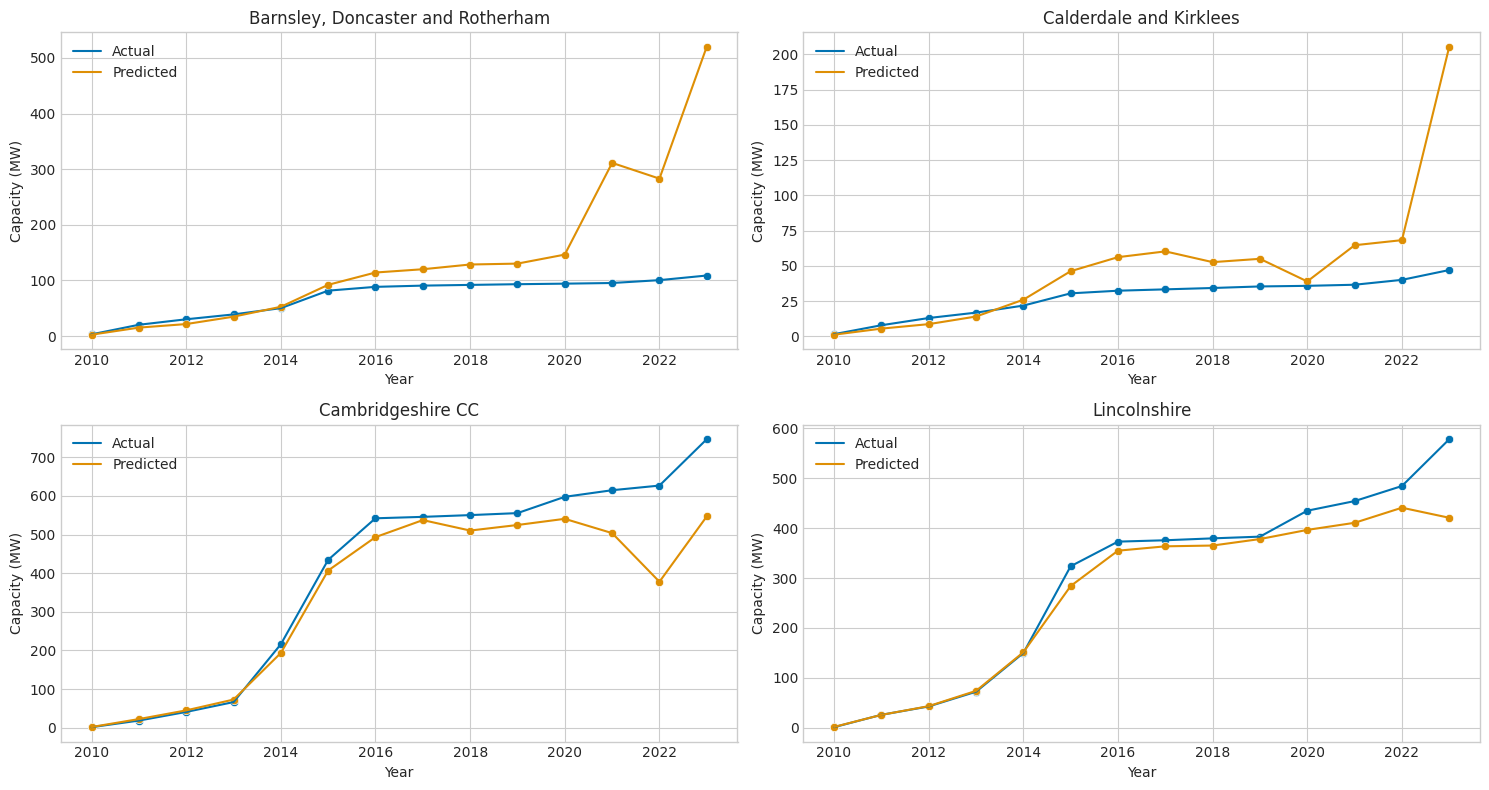

In [12]:

selected_regions = ['Barnsley, Doncaster and Rotherham', 'Calderdale and Kirklees', 'Cambridgeshire CC', 'Lincolnshire']
plot_timeseries_by_region(norm_gb, selected_regions=selected_regions,mode='MW', columns=2, legend=True, save_figure=False)

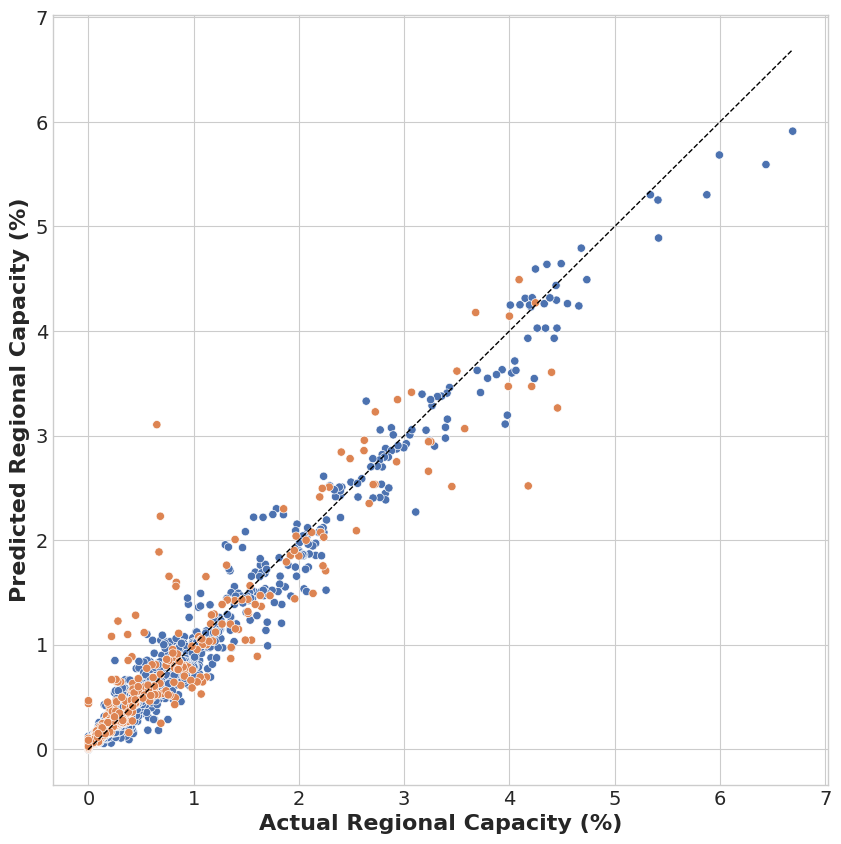

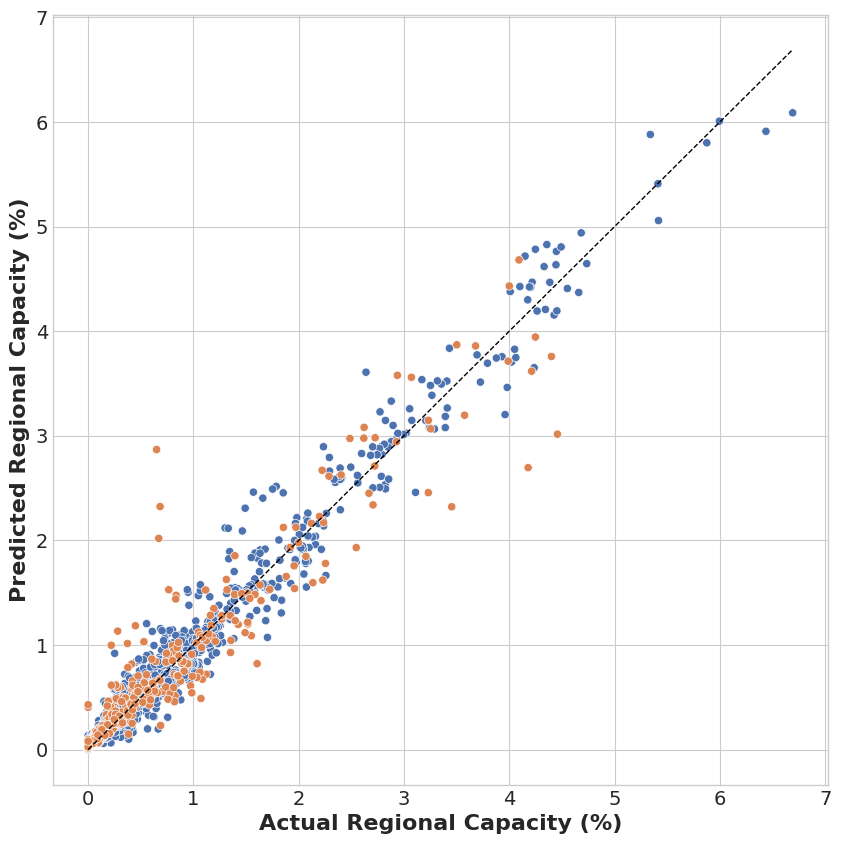

In [13]:
plot_actual_vs_predicted_regional_capacity(norm_gb, capacity_unit='percentage', scaled=False, split_column='set', save_figure=False)
plot_actual_vs_predicted_regional_capacity(norm_gb, capacity_unit='percentage', scaled=True, split_column='set', save_figure=False)


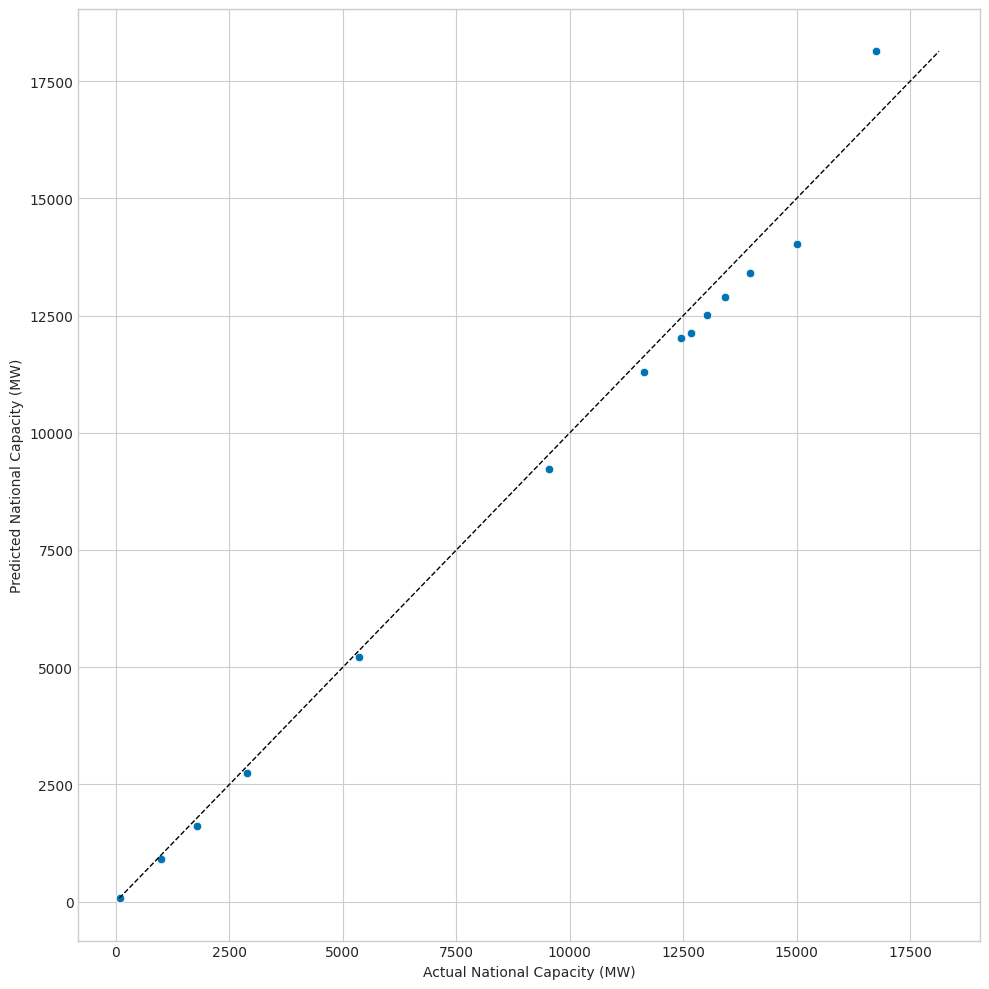

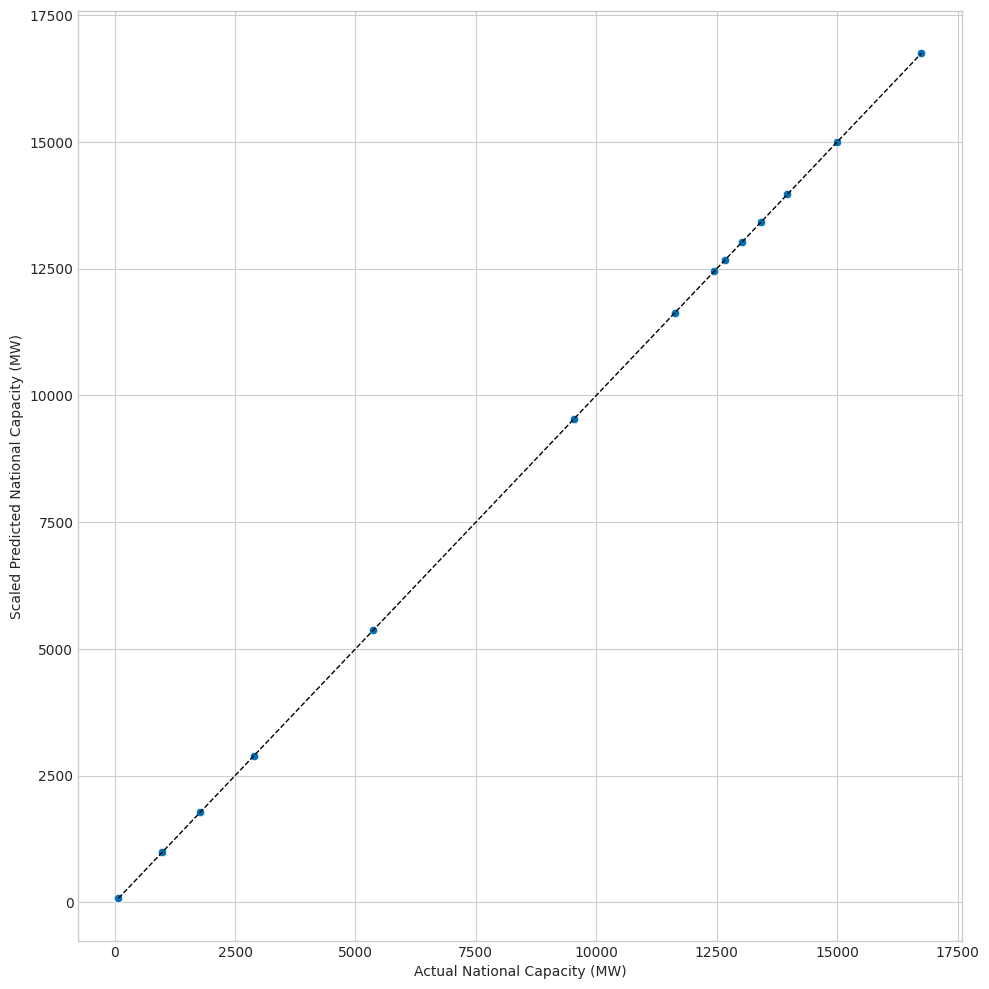

In [14]:
# national actual vs predicted plots
plot_actual_vs_predicted_national_capacity(norm_gb, by_factor=False, scaled=False, save_figure=False)
plot_actual_vs_predicted_national_capacity(norm_gb, by_factor=False, scaled=True, save_figure=False)